# TITANIC DATA - ANALYSIS OF SURVIVAL



The dataset contains a proportion of the passenger details in the famous Titanic voyage. The target variable is "Survived", which states whether the passenger survived or not
The idea is to analyse whether certain parameters of a passenger played a role in his/her chances of survival

Importing basic necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import *

# UNDERSTANDING THE DATASET

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passengerid = unique id for a passenger
Survived = 0-> did not survive ; 1-> survived
Pclass = Class - First, Second, Third
SibSp = Sibling spouse  on board
Parch = Parents Children on board
Embarked = Port of entry/ticket

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_convert = data.copy()
data_convert['Age'].isnull().sum()

177

# EXPLORATORY DATA ANALYSIS

# Survival Percentage

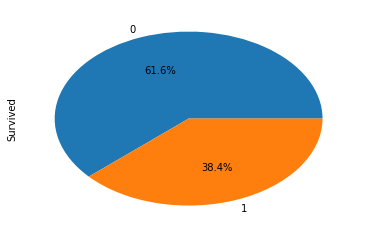

In [5]:
data['Survived'].value_counts().plot.pie(explode = [0,0], autopct = '%.1f%%')
plt.show()

Of the overall passengers in the dataset, 38.4% of the people survived

# Survival rate based on Gender

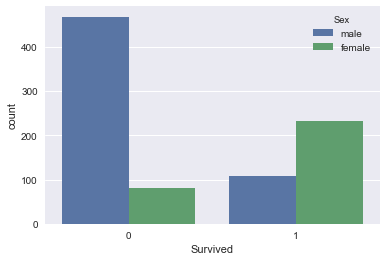

In [7]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x= 'Survived', hue = 'Sex', data = data)

From the above graph, it is pretty evident that most people who didnt survive are MALE and the number of females who survived 
is higher than the number of males

So, Gender played a significant part in ones survival chance

In [8]:
data_convert[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


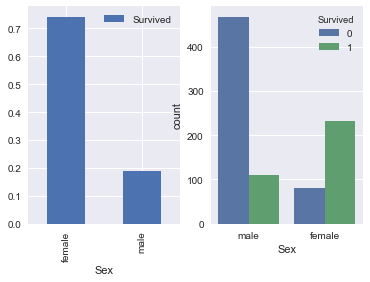

In [9]:
f,ax = plt.subplots(1,2)
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', hue= 'Survived', data=data,ax=ax[1])
plt.show()

 The probability of survival based on gender shows that female have a probability of about 0.7 and while for male, its about 0.2

# Class Vs Survival

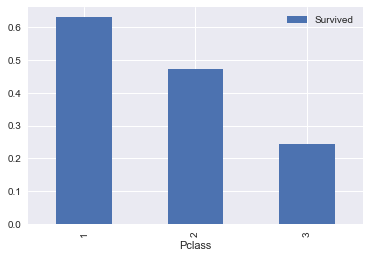

In [10]:
#f,ax = plt.subplots(1,2)
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()


From the above figure, its clear that passengers in higher class, had higher chances of survival

In [11]:
data_convert[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


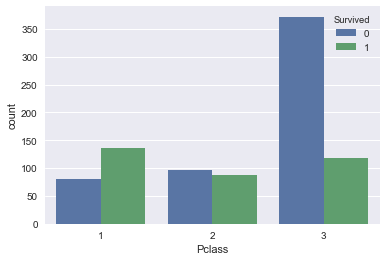

In [12]:
sns.countplot('Pclass', hue= 'Survived', data=data)
plt.show()

This plot shows the count of people who survived/did not survive based on class.
For first class, people who survived is higher than those who did not survive
For second class, its almost same
For third class, people who did not survive is much higher than those who did survive.

So, Class is another importatnt parameter in ones chances of survival

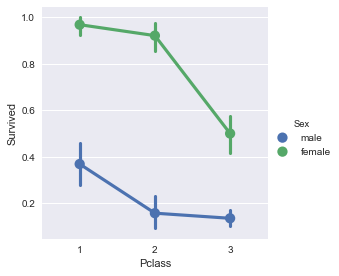

In [13]:
sns.factorplot('Pclass','Survived',hue = 'Sex',data = data)

In [14]:
pd.crosstab([data.Sex,data.Survived], data.Pclass,margins = True).style.background_gradient(cmap='spring')

# Effect of SiblingSpouse and Parent Children

In [15]:
data_convert[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
data_convert[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Correlation between differnt parameters and the Survival rate

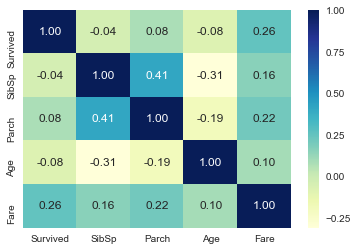

In [16]:
heat = sns.heatmap(data_convert[['Survived', 'SibSp', 'Parch','Age','Fare']].corr(),annot = True,fmt = '.2f',cmap = 'YlGnBu')

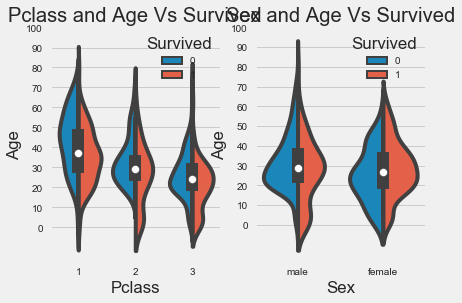

In [17]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1,2)
sns.violinplot('Pclass', 'Age',hue = 'Survived',data =data, split = True, ax= ax[0])
ax[0].set_title('Pclass and Age Vs Survived' )
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age',hue = 'Survived',data =data, split = True, ax= ax[1])
ax[1].set_title('Sex and Age Vs Survived' )
ax[1].set_yticks(range(0, 110, 10))



# DATA WRANGLING - FEATURE ENGINEERING

In [18]:
test_df=pd.read_csv('test.csv')
combine=[data,test_df]

data2=data.copy()

Drop Ticket, Cabin which do not seem to have a signigicance on the survival rate, since the values also seem randomised

In [19]:
data = data.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

Extract the Title of the person, example, Mr, Miss, to see if there is any significance on the survival rate

In [20]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
data[['Initial', 'Survived']].groupby(['Initial'], as_index=False).mean()

,Initial,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.162571
3,Mrs,0.795276
4,Other,0.111111


Drop Name and Passenger id from the dataset which do not have any value to the data

In [23]:
data = data.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [data, test_df]

# Convert SEX into Numeric

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


# Filling the missing AGE VALUES

In [26]:
#Average age of the passengers 
data['Age'].mean()

#Median age of passengers
data['Age'].median()

28.0

Fill the missing AGE values for each category of INITIALs with their corresponding AVERAGE


In [27]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [29]:
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,Mr,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,Mrs,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,Miss,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,Mrs,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,Mr,"(32.252, 48.168]"


The Age feature which is reflected now in Ageband as a category. So, Age can now be removed

In [31]:
data = data.drop(['AgeBand'], axis=1)
combine=[data,test_df]

In [ ]:
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

# FAMILY SIZE, SIBSP, PARCH

Create a new feature  - Family which inlcudes SIBSP and PARCH

In [33]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1


In [34]:
data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


From the family size, it is seen that people with a middle family size have had the higher chances of survival compared to single
passengers and those with large family size

In [ ]:
Create a new feature called alone, to see if the passenger was alone

In [36]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

In [37]:
data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


The above table shows a probability which is slightly in favor of passengers who are not alone, who had a family member

Now this feature can alone be used as a part of the model. The dependennt features such as family size, sibsp, parch which were used to create this feature can be dropped

In [38]:
data=data.drop(['Parch','SibSp','Family'],axis=1)
test_df=test_df.drop(['Parch','SibSp'],axis=1)

combine=[data,test_df]


# Analysing the impact of " EMBARKED"

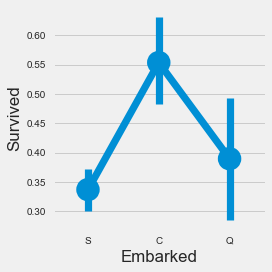

In [40]:
sns.factorplot('Embarked','Survived',data=data)



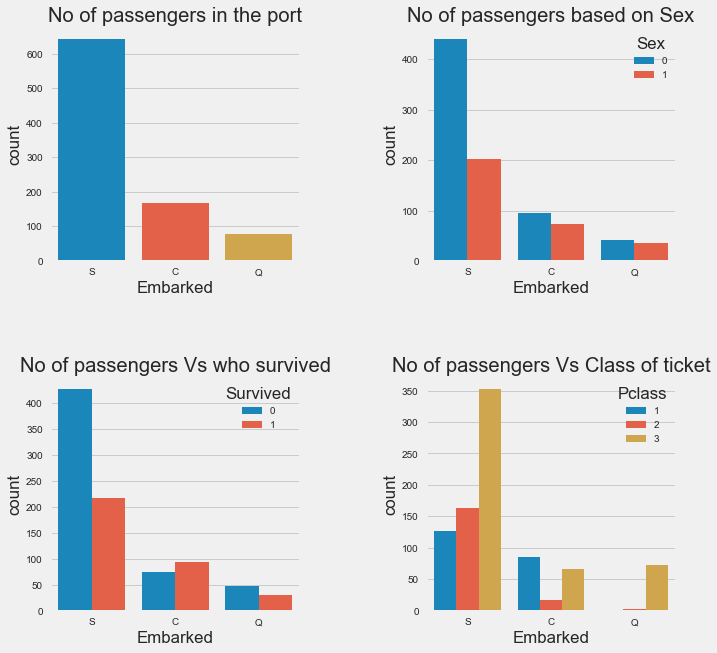

In [57]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title("No of passengers in the port")
sns.countplot('Embarked',hue="Sex",data=data,ax=ax[0,1])
ax[0,1].set_title("No of passengers based on Sex")

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title("No of passengers Vs who survived")
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title("No of passengers Vs Class of ticket")
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#To adjust the gap between each figure



It is seen that maximum passengers boarded the ship from "S" while those who boarded at "C" had higher chances of survival 
with respect to individual ports

Also, most passengers from "Q" are in third class
While most passengers of Second class are from "S"
Also, first class passengers are only from "S" and Q"

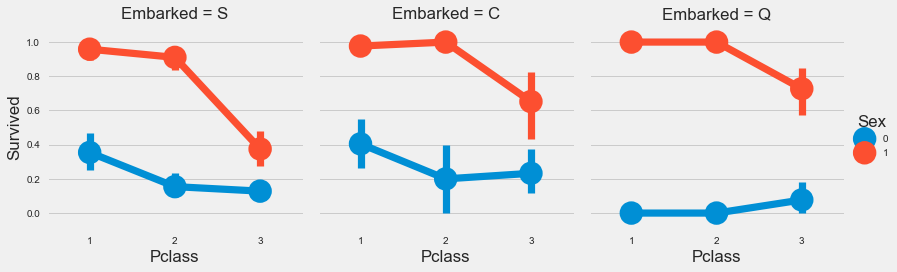

In [58]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

# Filling the missing "EMBARKED " values, converting that into Numeric

In [61]:
common_port=data['Embarked'].mode()

Port "S" is the most commonly embarked. So fill the missing values for "Embarked " with "S"

In [60]:
data['Embarked'].fillna(common_port,inplace=True)

In [62]:
data[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [63]:
combine=[data,test_df]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [64]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,IsAlone
0,0,3,0,1.0,7.2500,0,Mr,0
1,1,1,1,2.0,71.2833,1,Mrs,0
2,1,3,1,1.0,7.9250,0,Miss,1
3,1,1,1,2.0,53.1000,0,Mrs,0
4,0,3,0,2.0,8.0500,0,Mr,1


# Filling the missing "FARE" value

Similar to Age, find the Fare for each Class, and fill the median value of each class for that class

In [66]:
data.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [67]:
data.loc[(data.Fare.isnull())&(data.Pclass==1),'Fare']=60.2875
data.loc[(data.Fare.isnull())&(data.Pclass==2),'Fare']=14.25
data.loc[(data.Fare.isnull())&(data.Pclass==3),'Fare']=8.05

In [68]:
test_df.loc[(test_df.Fare.isnull())&(data.Pclass==1),'Fare']=60.2875
test_df.loc[(test_df.Fare.isnull())&(data.Pclass==2),'Fare']=14.25
test_df.loc[(test_df.Fare.isnull())&(data.Pclass==3),'Fare']=8.05

Create a Fare band , similar to AGE band

In [69]:
data['FareBand'] = pd.qcut(data['Fare'], 4)


data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
data.groupby(['FareBand'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

Convert the FAREBAND into categories based on the fare, so that we can drop FARE column which is continouos

In [70]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [71]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,IsAlone,FareBand
0,0,3,0,1.0,0,0,Mr,0,"(-0.001, 7.91]"
1,1,1,1,2.0,3,1,Mrs,0,"(31.0, 512.329]"
2,1,3,1,1.0,1,0,Miss,1,"(7.91, 14.454]"
3,1,1,1,2.0,3,0,Mrs,0,"(31.0, 512.329]"
4,0,3,0,2.0,1,0,Mr,1,"(7.91, 14.454]"


In [73]:
#The fare band column can be dropped now
data = data.drop(['FareBand'], axis=1)
combine = [data, test_df]

# MODELING